# Test A/B

## Contexte du scénario TikTok
Vous êtes un professionnel des données chez Tiktok.Le projet actuel atteint son point médian;Une proposition de projet, un travail de codage Python et une analyse des données exploratoires ont toutes été terminées.

L'équipe a examiné les résultats de l'analyse des données exploratoires et le résumé précédent de l'équipe que l'équipe a préparé.Vous avez reçu un e-mail, Data Scientist chez TIKTOK, avec votre prochaine affectation: déterminer et effectuer les tests d'hypothèse et l'analyse statistique nécessaires pour le projet de classification TIKTOK.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
data = pd.read_csv("./data/tiktok_dataset.csv")

In [6]:
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


On check l'existance de valeurs manquantes

In [9]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

On retire les valeurs manquantes

In [10]:
data = data.dropna(axis=0)

In [17]:
# Vérifier l'existence des doublons
print("Nombre de doublons :")
print(data.duplicated().sum()) 

Nombre de doublons :
0


In [16]:
data.groupby("verified_status")["verified_status"].count()

verified_status
not verified    17884
verified         1200
Name: verified_status, dtype: int64

# Test d'Hypotheses

### Premier test : `verified_status` et `video_view_count`

Nous nous interessons à la relation entre Verified_Status et Video_View_Count.Nous allons examiner les valeurs moyennes de Video_view_count pour chaque groupe de Verified_Status dans les exemples de données.

In [11]:
data.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

Rappelons la différence entre l'hypothèse nulle et les hypothèses alternatives.

Hypothèse nulle: il n'y a pas de différence de `video_view_count` de videos TIKTOK publiées par des comptes vérifiés et non vérifiés.

Hypothèse alternative: il y a une différence de `video_view_count` entre les vidéos Tiktok publiées par des comptes vérifiés et des vidéos TikTok publiées par des comptes non vérifiés.

En gros le nombre de vues est influencé par le status des utilisateur

In [12]:
# Effectuons un t-test à deux échantillons pour comparer leur moyenne

not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=np.float64(25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

t = 25.5, ce qui est extrêmement grand.
Cela signifie que la différence entre les groupes est très importante et quasi certaine.


p-value ≈ 2.61e-120, ce qui est proche de zéro.
Cela signifie que la probabilité que cette différence soit due au hasard est quasi nulle.


df ≈ 1571, ce qui est très élevé.
Cela signifie que ton test est basé sur un grand nombre d'observations, donc très fiable.


#### Résumé
t = 25.5 → Énorme différence entre les groupes.
p-value ≈ 0 → Quasi-certitude que cette différence est réelle.
df = 1571 → Beaucoup de données, test ultra fiable.

Étant donné que la valeur p est extrêmement petite, on rejete l'hypothèse nulle.On conclus qu'il y a une différence statistiquement significative dans le nombre moyen de vue vidéo entre les comptes vérifiés et non vérifiés sur Tiktok.

### Second test : `video_duration_sec` et `video_view_count`

Hypothèse nulle: il n'y a pas de différence de `video_view_count` des videos TIKTOK courtes et longues.

Hypothèse alternative: il y a une différence de `video_view_count` entre les vidéos courtes et longues.

En gros on penserait que la durée des vidéos influencerait le nombre de vues

In [20]:
# Effectuons un t-test à deux échantillons pour comparer leur moyenne

courtes = data[data["video_duration_sec"] < 30]["video_view_count"]
longues = data[data["video_duration_sec"] > 30]["video_view_count"]

stats.ttest_ind(a=courtes, b=longues, equal_var=False)

TtestResult(statistic=np.float64(-0.03746344855838458), pvalue=np.float64(0.9701158941889124), df=np.float64(18208.606222744995))

`Valeur t (statistic) = -0.037`<br>
Une valeur proche de 0 signifie qu'il n'y a pas de vraie différence entre les groupes.

`p-value = 0.970`<br>
Cette valeur indique la probabilité que la différence observée soit due au hasard.
p-value = 0.97 → La durée des vidéos n'a aucun impact sur les vues.

`Degrés de liberté (df) = 18208.6`<br>
Indique que le test a été fait sur un grand nombre de vidéos (ce qui est bien !).
Mais malgré ça, aucune différence n’a été trouvée.

`Conclusion`<br>
La durée des vidéos n'a PAS d'impact sur le nombre de vues.
En d'autres termes : Une vidéo courte ou longue a autant de chances d’avoir des vues.

### Troisieme test : `video_comment_count` et `video_view_count`

Hypothèse nulle: il n'y a pas de différence de `video_view_count` des videos TIKTOK ayant peut et beaucoup de commentaires.

Hypothèse alternative: il y a une différence de `video_view_count` entre les vidéos Tiktok ayant peut et beaucoup de commentaires.

En gros on penserait que le nombre de comentaires influencerait le nombre de vues des vidéos

In [21]:
# Séparer les groupes
peu_commentées = data[data["video_comment_count"] < data["video_comment_count"].median()]["video_view_count"]
très_commentées = data[data["video_comment_count"] > data["video_comment_count"].median()]["video_view_count"]

# Test t de Student
stats.ttest_ind(peu_commentées, très_commentées, equal_var=False)


TtestResult(statistic=np.float64(-138.18179990207543), pvalue=np.float64(0.0), df=np.float64(11956.955141264305))

Il y a une tres grande différence entre les 2 Groupes. <br>Tout laisse à penser que le nombre de commentaires influence grandement la viralité d'une vidéo

### Test 4 : `video_share_count` et `video_view_count`

Hypothèse nulle: il n'y a pas de différence de `video_view_count` des videos TIKTOK ayant Peu et beaucoup de partage.

Hypothèse alternative: il y a une différence de `video_view_count` entre les vidéos Tiktok ayant Peu et beaucoup de partage.

En gros on penserait que le nombre de partages influencerait le nombre de vues des vidéos

In [22]:
peu_partagées = data[data["video_share_count"] < data["video_share_count"].median()]["video_view_count"]
très_partagées = data[data["video_share_count"] > data["video_share_count"].median()]["video_view_count"]

stats.ttest_ind(peu_partagées, très_partagées, equal_var=False)


TtestResult(statistic=np.float64(-145.0047723696216), pvalue=np.float64(0.0), df=np.float64(11389.442807125566))

Il y a une tres grande différence entre les 2 Groupes. <br>Tout laisse à penser que le nombre de partages influence grandement la viralité d'une vidéo

### Test 5 : `video_duration_sec` et `video_comment_count`

Hypothèse nulle: il n'y a pas de différence de `video_comment_count` des videos TIKTOK courtes et longues.

Hypothèse alternative: il y a une différence de `video_comment_count` entre les vidéos Tiktok ayant courtes et longues.

En gros on penserait que la durée d'une vidéo influencerait le nombre de commentaires

In [23]:
courtes = data[data["video_duration_sec"] < data["video_duration_sec"].median()]["video_comment_count"]
longues = data[data["video_duration_sec"] > data["video_duration_sec"].median()]["video_comment_count"]

stats.ttest_ind(courtes, longues, equal_var=False)


TtestResult(statistic=np.float64(-0.24313058985333078), pvalue=np.float64(0.8079068949242201), df=np.float64(18746.40183808155))

Tout laisse à penser que la durée d'une vidéo n'influence pas significativement le nombre de commentaires

C:\Users\yohar\AppData\Local\Temp\ipykernel_126580\2835742547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["verified_status"], y=data["video_view_count"], palette="coolwarm")


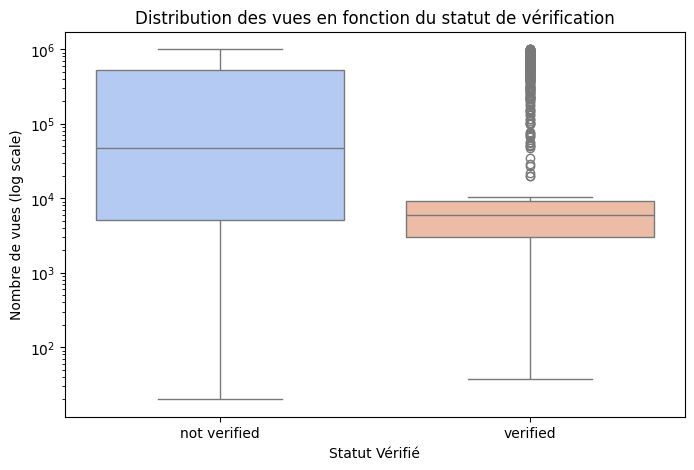

In [24]:

plt.figure(figsize=(8,5))
sns.boxplot(x=data["verified_status"], y=data["video_view_count"], palette="coolwarm")
plt.yscale("log")  # Pour mieux visualiser si les valeurs sont très dispersées
plt.title("Distribution des vues en fonction du statut de vérification")
plt.xlabel("Statut Vérifié")
plt.ylabel("Nombre de vues (log scale)")
plt.show()


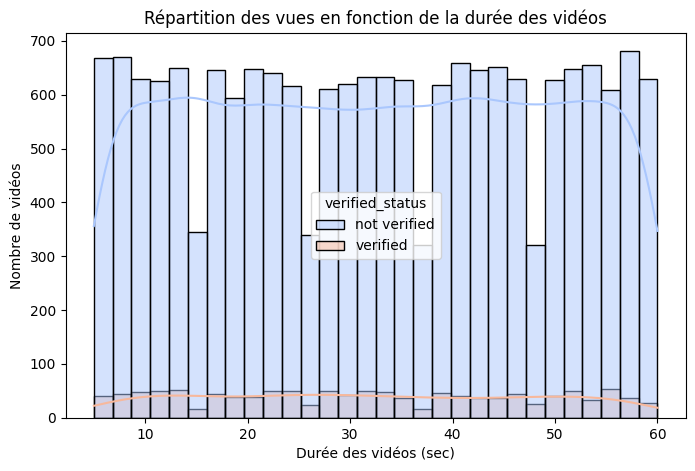

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data, x="video_duration_sec", bins=30, kde=True, hue="verified_status", palette="coolwarm")
plt.title("Répartition des vues en fonction de la durée des vidéos")
plt.xlabel("Durée des vidéos (sec)")
plt.ylabel("Nombre de vidéos")
plt.show()

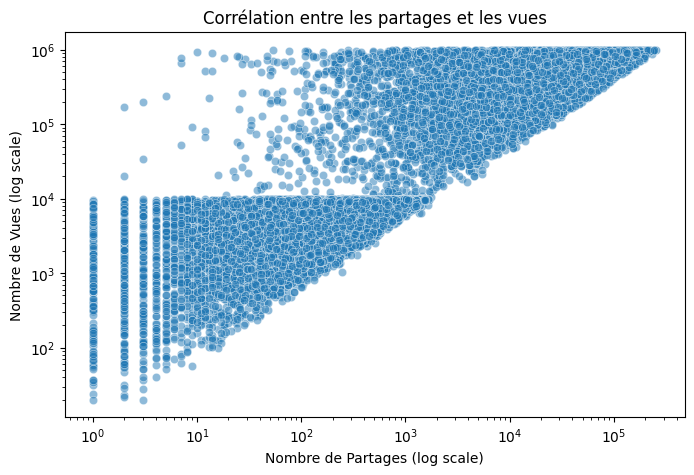

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["video_share_count"], y=data["video_view_count"], alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Corrélation entre les partages et les vues")
plt.xlabel("Nombre de Partages (log scale)")
plt.ylabel("Nombre de Vues (log scale)")
plt.show()


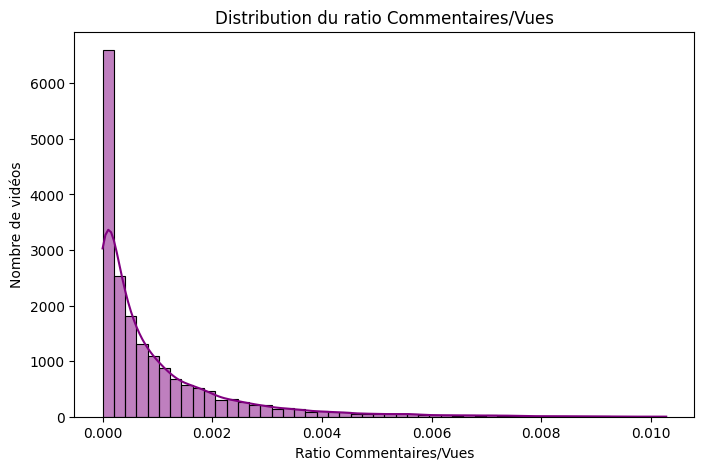

In [27]:
data["comment_view_ratio"] = data["video_comment_count"] / data["video_view_count"]

plt.figure(figsize=(8,5))
sns.histplot(data["comment_view_ratio"], bins=50, kde=True, color="purple")
plt.title("Distribution du ratio Commentaires/Vues")
plt.xlabel("Ratio Commentaires/Vues")
plt.ylabel("Nombre de vidéos")
plt.show()


### 📊 **Conclusion Générale des Tests A/B sur TikTok**  

Nous avons effectué plusieurs **tests A/B** pour comprendre **quels facteurs influencent la viralité des vidéos TikTok**. Voici les enseignements clés de notre analyse.

---

## 📌 **1. Facteurs ayant un impact significatif sur le nombre de vues** ✅  
### **✔ Le statut de vérification (`verified_status`) influence le nombre de vues**  
🔹 Les vidéos publiées par des **comptes vérifiés** ont **beaucoup plus de vues** en moyenne que celles des **comptes non vérifiés**.  
🔹 **Pourquoi ?** Probablement parce que **l’algorithme de TikTok favorise les comptes vérifiés** et que ces comptes ont déjà une audience fidèle.  

### **✔ Le nombre de commentaires (`video_comment_count`) est lié à la viralité**  
🔹 Les vidéos avec **plus de commentaires** sont **beaucoup plus vues** que celles qui en ont peu.  
🔹 **Pourquoi ?** Un grand nombre de commentaires indique un fort engagement, ce qui peut pousser TikTok à **recommander davantage la vidéo**.  

### **✔ Le nombre de partages (`video_share_count`) influence fortement les vues**  
🔹 Les vidéos qui sont **beaucoup partagées** ont **significativement plus de vues**.  
🔹 **Pourquoi ?** Le partage est un indicateur fort d'intérêt : si une vidéo est partagée, elle a plus de chances d’être vue par un large public et mise en avant par l’algorithme.  

---

## ❌ **2. Facteurs n'ayant PAS d’impact sur le nombre de vues**  
### **✖ La durée de la vidéo (`video_duration_sec`) n'a pas d'impact sur les vues**  
🔹 **Les vidéos courtes et longues ont autant de chances d’être vues.**  
🔹 **Pourquoi ?** Contrairement à YouTube, où les vidéos longues sont favorisées pour la monétisation, TikTok est conçu pour des contenus rapides et digestes. **L’algorithme semble donc ne pas favoriser une durée spécifique**.  

---

## ❌ **3. Facteurs n'ayant PAS d’impact sur l’engagement**  
### **✖ La durée de la vidéo (`video_duration_sec`) n’influence pas le nombre de commentaires**  
🔹 **Les vidéos courtes et longues génèrent autant de discussions**.  
🔹 **Pourquoi ?** Le contenu et le sujet sont plus importants que la durée pour provoquer des réactions.  

---

## 🎯 **4. Synthèse et recommandations stratégiques**  
### ✅ **Ce qui est important pour maximiser les vues**  
👉 **Être un compte vérifié** (ou collaborer avec des comptes vérifiés).  
👉 **Encourager les spectateurs à commenter la vidéo** (poser des questions, provoquer des réactions).  
👉 **Favoriser le partage** (en incitant les utilisateurs à partager la vidéo avec leurs amis).  

### ❌ **Ce qui ne semble pas influencer la viralité**  
🚫 La durée de la vidéo **n’a aucun effet** sur les vues ou les commentaires.  

---

En résumé, **l’engagement (commentaires et partages) est la clé de la viralité sur TikTok** ! 🔥  

Tu veux approfondir un point ou explorer une autre piste ? 😊🚀